In [350]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from joblib import dump, load
from tabulate import tabulate

In [351]:
# convert csv to dataframe
df_final=pd.read_csv(r"C:\Users\91934\Desktop\car dheko\stdenc.csv")
df_final

,ownerNo,modelYear,price,Kms Driven,Mileage,Seats,Fuel type_Cng,Fuel type_Diesel,Fuel type_Electric,Fuel type_Lpg,...,Color_golden brown,Color_m grey,Color_magma gray,Color_urban titanim,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,3,2015,4.00,120000,23.10,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,2018,8.11,32706,17.00,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,2018,5.85,11949,23.84,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,2014,4.62,17794,19.10,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,2015,7.90,60000,23.65,5,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,1,2022,5.10,10000,25.24,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7436,1,2014,1.80,120000,22.74,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7437,3,2011,5.50,50000,11.74,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7438,1,2012,1.40,40000,18.50,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [352]:
# statistical details of the data
df_final.describe()

,ownerNo,modelYear,price,Kms Driven,Mileage,Seats,Fuel type_Cng,Fuel type_Diesel,Fuel type_Electric,Fuel type_Lpg,...,Color_golden brown,Color_m grey,Color_magma gray,Color_urban titanim,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
count,7440.000000,7440.000000,7440.000000,7.440000e+03,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,...,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000
mean,1.366532,2016.401478,6.431452,5.968454e+04,19.635031,5.175672,0.012903,0.282124,0.002823,0.001882,...,0.000134,0.000134,0.000134,0.000134,0.177151,0.167876,0.163172,0.184005,0.137903,0.169892
std,0.642772,3.737448,3.667781,4.418047e+04,3.712095,0.620633,0.112865,0.450063,0.053056,0.043341,...,0.011593,0.011593,0.011593,0.011593,0.381822,0.373782,0.369547,0.387515,0.344822,0.375564
min,0.000000,1985.000000,1.000000,1.010000e+02,7.080000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2014.000000,3.800000,3.219150e+04,17.400000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2017.000000,5.650000,5.556450e+04,19.245568,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2019.000000,8.100000,8.000000e+04,21.700000,5.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2023.000000,18.250000,2.000022e+06,140.000000,10.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [353]:
# create x and y datas

x=df_final.drop(columns=["price"],axis=1)
y=df_final["price"]

In [354]:
# scaling the data with standardScaler
from joblib import dump, load
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [355]:
with open('standard.joblib','wb') as f:
    dump(scaler,f)

In [356]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def best_ML_algorithm(x, y, algorithms):
    # Split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

    results = []

    for algorithm in algorithms:
        # Fit the model
        model = algorithm().fit(x_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(x_test)

        # Calculate performance metrics
        MSE_1 = mean_squared_error(y_test, y_pred)
        MAE_1 = mean_absolute_error(y_test, y_pred)
        RMSE_1 = np.sqrt(MSE_1)
        r_squr_1 = r2_score(y_test, y_pred)
        
        # Append results
        results.append({
            "model": type(model).__name__,
            "MAE": MAE_1,
            "MSE": MSE_1,
            "RMSE": RMSE_1,
            "R2": r_squr_1
        })
        
        # Print model scores
        print(f"{type(model).__name__} Train score: {model.score(x_train, y_train)}")
        print(f"{type(model).__name__} Test score: {model.score(x_test, y_test)}")
        
        # Plot Actual vs Predicted Prices
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y_test, y=y_pred)
        plt.xlabel('Actual Prices')
        plt.ylabel('Predicted Prices')
        plt.title(f'{type(model).__name__}: Actual vs Predicted Prices')
        plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Reference line
        plt.grid(True)
        plt.show()

    # Convert results into a DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df


In [357]:
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═══════════════════════════╤═════════════╤════════════╤═════════════╤══════════════╕
│ model                     │         MAE │        MSE │        RMSE │           R2 │
╞═══════════════════════════╪═════════════╪════════════╪═════════════╪══════════════╡
│ LinearRegression          │ 1.99423e+13 │ 3.4058e+28 │ 1.84548e+14 │ -2.54889e+27 │
├───────────────────────────┼─────────────┼────────────┼─────────────┼──────────────┤
│ DecisionTreeRegressor     │ 1.03667     │ 2.91245    │ 1.70659     │  0.782033    │
├───────────────────────────┼─────────────┼────────────┼─────────────┼──────────────┤
│ RandomForestRegressor     │ 0.784897    │ 1.59406    │ 1.26256     │  0.880701    │
├───────────────────────────┼─────────────┼────────────┼─────────────┼──────────────┤
│ GradientBoostingRegressor │ 1.13405     │ 2.63657    │ 1.62375     │  0.80268     │
├───────────────────────────┼─────────────┼────────────┼─────────────┼──────────────┤
│ ExtraTreesRegressor       │ 0.776134    │ 1.60436   

In [358]:
!pip install xgboost
!pip install lightgbm

LinearRegression Train score: 0.8983653586290216
LinearRegression Test score: -2.548889902393828e+27


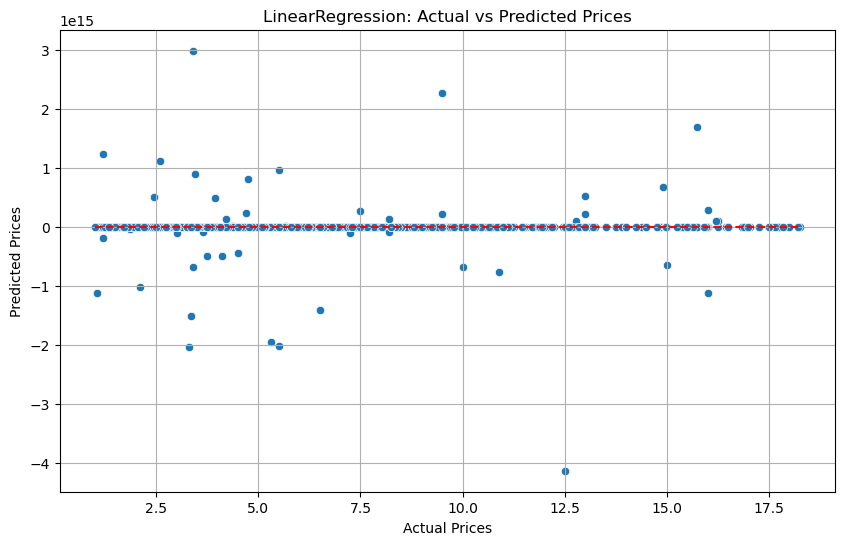

DecisionTreeRegressor Train score: 0.9997161936718325
DecisionTreeRegressor Test score: 0.7797123210773949


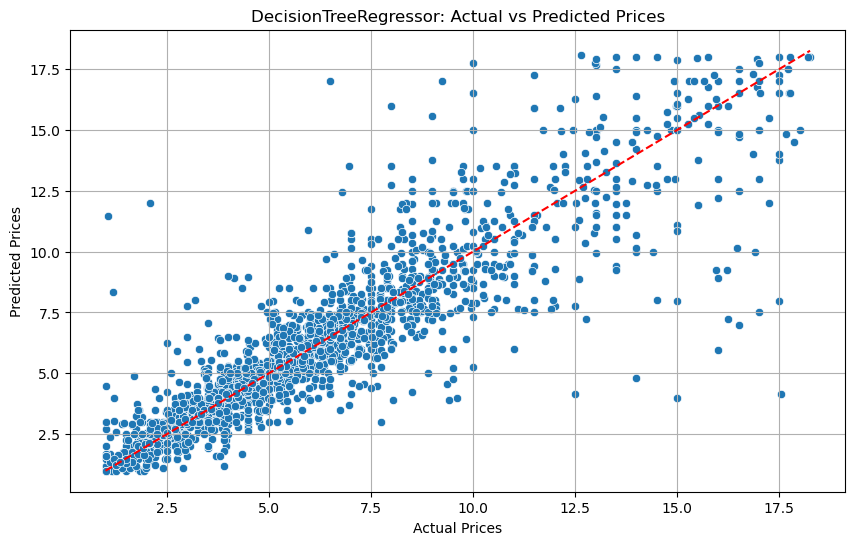

RandomForestRegressor Train score: 0.9819475034414775
RandomForestRegressor Test score: 0.8814543797181691


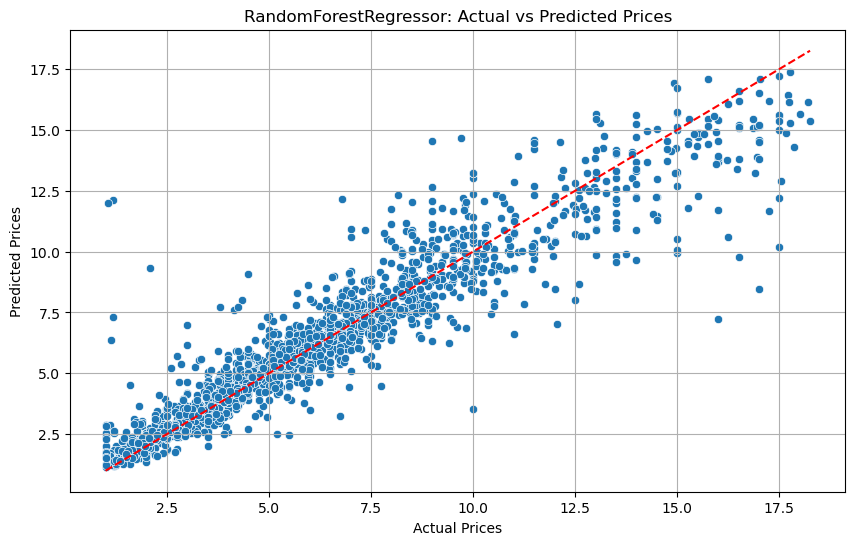

GradientBoostingRegressor Train score: 0.8344679337923944
GradientBoostingRegressor Test score: 0.8024464912445025


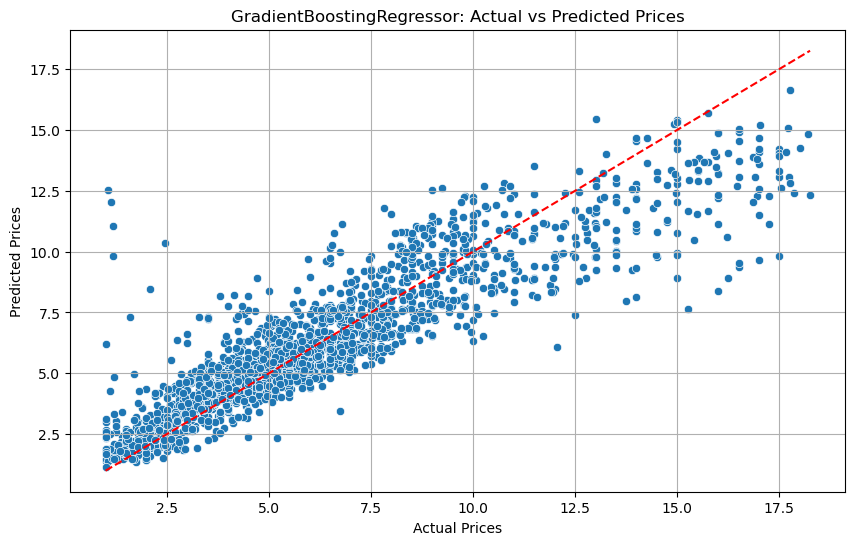

ExtraTreesRegressor Train score: 0.9997161936718325
ExtraTreesRegressor Test score: 0.8783729590125272


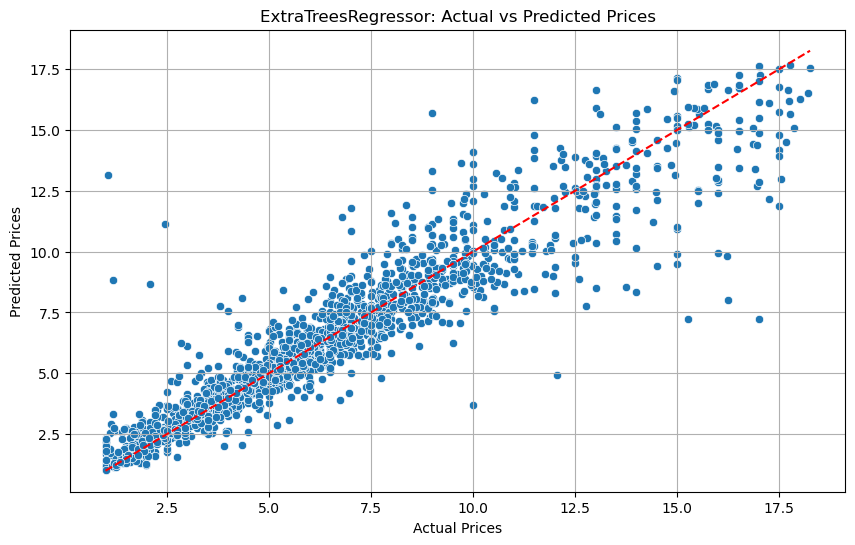

XGBRegressor Train score: 0.9622914488472866
XGBRegressor Test score: 0.8892691709896563


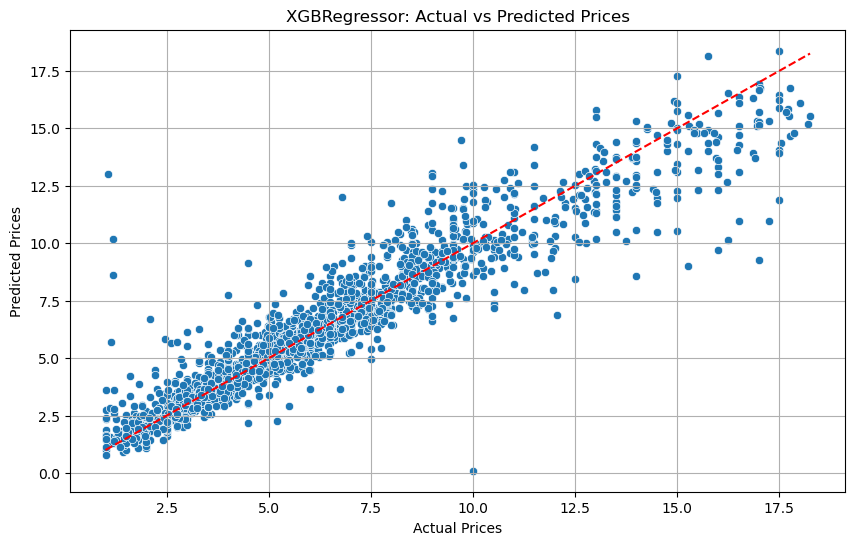

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 874
[LightGBM] [Info] Number of data points in the train set: 5580, number of used features: 116
[LightGBM] [Info] Start training from score 6.433556
LGBMRegressor Train score: 0.9292880211491131
LGBMRegressor Test score: 0.8679258091646115


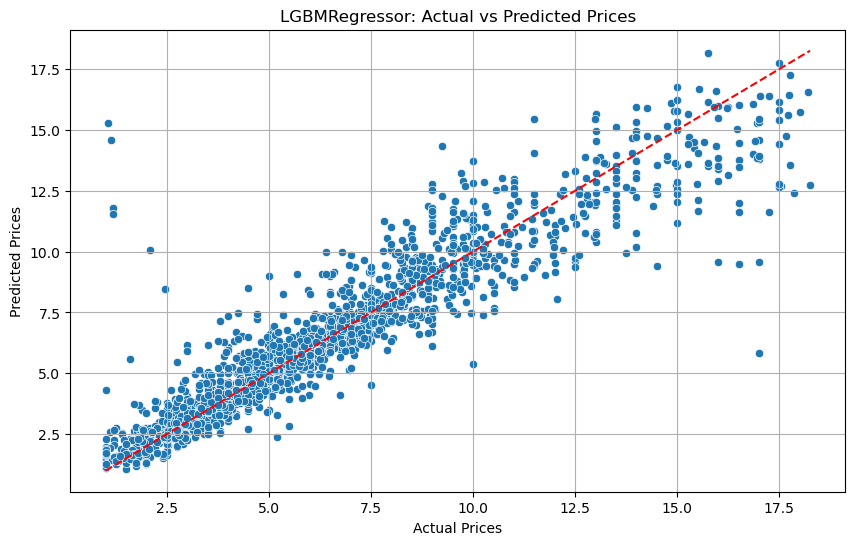

In [359]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
import lightgbm as lgb


# using above function try to identify the best algorithm

algorithms = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor,XGBRegressor,lgb.LGBMRegressor]

results_df = best_ML_algorithm(x_scaled,y, algorithms)

## L1 and L2 Regularaization

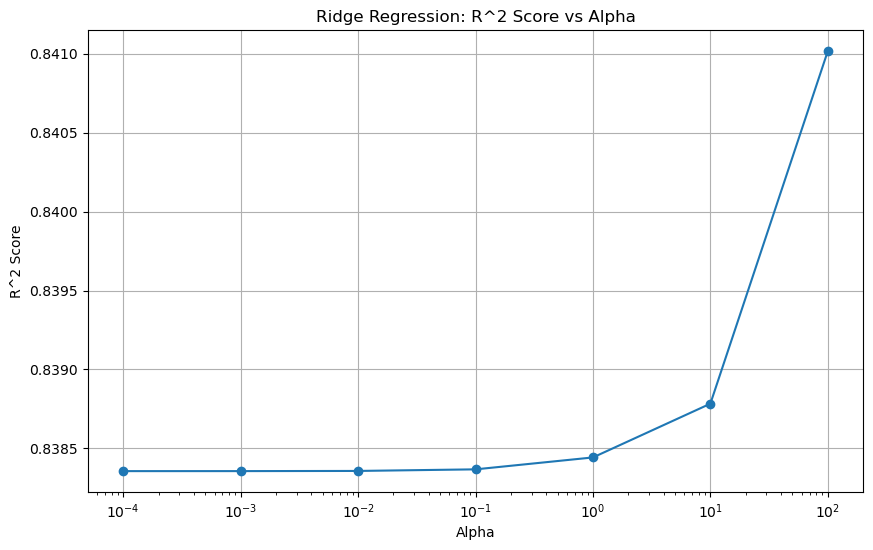

Alpha: 0.0001, R^2 Score: 0.8383558786398055
Alpha: 0.001, R^2 Score: 0.8383559775230317
Alpha: 0.01, R^2 Score: 0.8383570220072408
Alpha: 0.1, R^2 Score: 0.8383671140783729
Alpha: 1, R^2 Score: 0.8384425734625729
Alpha: 10, R^2 Score: 0.8387831419588978
Alpha: 100, R^2 Score: 0.8410164226923831


In [361]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score


# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)

# List of alpha values to try
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
values = []

# Fit and evaluate the Ridge model for each alpha
for i in alpha_values:
    ridgeModel = Ridge(alpha=i)
    ridgeModel.fit(X_train, Y_train)
    
    # Predict on the test set
    y_pred = ridgeModel.predict(X_test)
    
    # Calculate R^2 score
    r_squr = r2_score(Y_test, y_pred)
    values.append(r_squr)

# Create a plot to visualize the R^2 score for each alpha value
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, values, marker='o')
plt.xscale('log')  # Use log scale for better visualization of alpha variations
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.title('Ridge Regression: R^2 Score vs Alpha')
plt.grid(True)
plt.show()

# Optionally, print the results
for alpha, r2 in zip(alpha_values, values):
    print(f"Alpha: {alpha}, R^2 Score: {r2}")


In [362]:
# Identify the best alpha based on the maximum R^2 score
best_alpha_ridge = alpha_values[np.argmax(values)]

# Fit the Ridge model with the best alpha
ridgeModel_1 = Ridge(alpha=best_alpha_ridge)
ridgeModel_1.fit(X_train, Y_train)

# Make predictions using the test data
y_pred_ridge = ridgeModel_1.predict(X_test)

# Calculate the R^2 score for the best model
r2_ridge = r2_score(Y_test, y_pred_ridge)

# Output the best alpha and corresponding R^2 score
print(f"Best Alpha: {best_alpha_ridge}")
print(f"R^2 Score with Best Alpha: {r2_ridge}")


Best Alpha: 100
R^2 Score with Best Alpha: 0.8410164226923831


In [363]:
# Model evaluation: MSE, MAE, RMSE, and R^2 score
MSE_ridge = mean_squared_error(Y_test, y_pred_ridge)
MAE_ridge = mean_absolute_error(Y_test, y_pred_ridge)
RMSE_ridge = np.sqrt(MSE_ridge)
r_squr_ridge = r2_score(Y_test, y_pred_ridge)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {MSE_ridge}")
print(f"Mean Absolute Error (MAE): {MAE_ridge}")
print(f"Root Mean Squared Error (RMSE): {RMSE_ridge}")
print(f"R^2 Score: {r_squr_ridge}")


Mean Squared Error (MSE): 2.124321692652165
Mean Absolute Error (MAE): 0.9191905124268434
Root Mean Squared Error (RMSE): 1.4575052976412006
R^2 Score: 0.8410164226923831


In [364]:
# Create a DataFrame to view the evaluation metrics
ridge = pd.DataFrame({
    "model": ["RidgeRegressor"],  # Ensure the model name is in a list to match rows
    "MAE": [MAE_ridge],  # Use the individual scalar values for each metric
    "MSE": [MSE_ridge],
    "RMSE": [RMSE_ridge],
    "R2": [r_squr_ridge]
})

# Display the DataFrame
print(tabulate(ridge, headers='keys', tablefmt='fancy_grid', showindex=False))


╒════════════════╤══════════╤═════════╤═════════╤══════════╕
│ model          │      MAE │     MSE │    RMSE │       R2 │
╞════════════════╪══════════╪═════════╪═════════╪══════════╡
│ RidgeRegressor │ 0.919191 │ 2.12432 │ 1.45751 │ 0.841016 │
╘════════════════╧══════════╧═════════╧═════════╧══════════╛


D:\ananconda navi\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.589e+02, tolerance: 7.522e+00
  model = cd_fast.enet_coordinate_descent(
D:\ananconda navi\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.859e+00, tolerance: 7.522e+00
  model = cd_fast.enet_coordinate_descent(


R^2 Scores for different alpha values:
Alpha: 0.0001, R^2: 0.8350582871518861
Alpha: 0.001, R^2: 0.8360972820665902
Alpha: 0.01, R^2: 0.8386933600546015
Alpha: 0.1, R^2: 0.7757778174982606
Alpha: 1, R^2: 0.3998728578326727
Alpha: 10, R^2: -5.300535646401983e-06
Alpha: 100, R^2: -5.300535646401983e-06


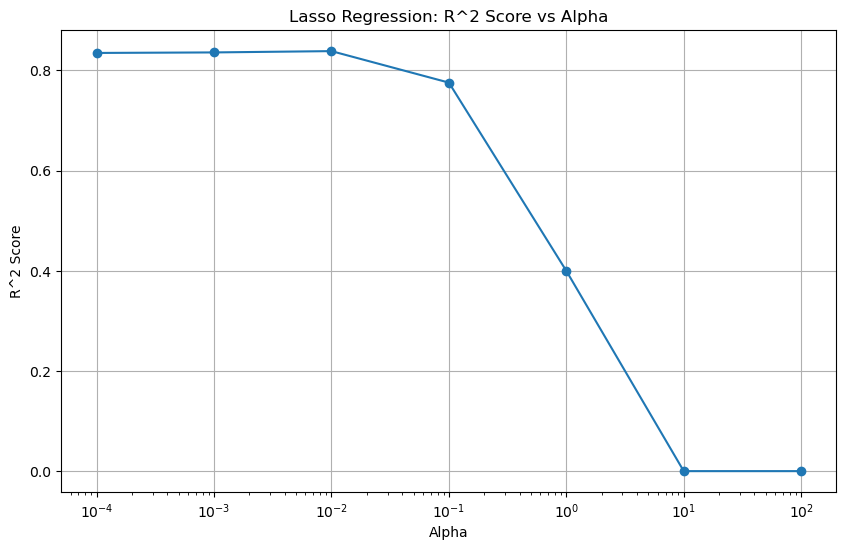

In [365]:
from sklearn.linear_model import Lasso
# List of alpha values to try
alpha_values_L = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
values_L = []

# Fit and evaluate the Lasso model for each alpha value
for i in alpha_values_L:
    LassoModel = Lasso(alpha=i)
    LassoModel.fit(X_train, Y_train)
    
    # Predict on the test set
    y_pred = LassoModel.predict(X_test)
    
    # Calculate R^2 score
    r_squr = r2_score(Y_test, y_pred)
    values_L.append(r_squr)

# Print the R^2 values for each alpha
print("R^2 Scores for different alpha values:")
for alpha, r2 in zip(alpha_values_L, values_L):
    print(f"Alpha: {alpha}, R^2: {r2}")

# Plotting R^2 scores vs alpha values
plt.figure(figsize=(10, 6))
plt.plot(alpha_values_L, values_L, marker='o')
plt.xscale('log')  # Log scale for better visualization of alpha variations
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.title('Lasso Regression: R^2 Score vs Alpha')
plt.grid(True)
plt.show()


In [366]:
# Identify the best alpha based on the maximum R^2 score
best_alpha_lasso = alpha_values_L[np.argmax(values_L)]

# Fit the Lasso model with the best alpha
LassoModel_1 = Lasso(alpha=best_alpha_lasso)
LassoModel_1.fit(X_train, Y_train)

# Make predictions using the test data
y_pred_lasso = LassoModel_1.predict(X_test)

# Calculate the R^2 score for the best model
r2_lasso = r2_score(Y_test, y_pred_lasso)

# Print the best alpha and corresponding R^2 score
print(f"Best Alpha for Lasso: {best_alpha_lasso}")
print(f"R^2 Score with Best Alpha: {r2_lasso}")


Best Alpha for Lasso: 0.01
R^2 Score with Best Alpha: 0.8386933600546015


In [367]:
# Evaluate the model using MSE, MAE, RMSE, and R² score
MSE_lasso = mean_squared_error(Y_test, y_pred_lasso)
MAE_lasso = mean_absolute_error(Y_test, y_pred_lasso)
RMSE_lasso = np.sqrt(MSE_lasso)
r_squr_lasso = r2_score(Y_test, y_pred_lasso)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {MSE_lasso}")
print(f"Mean Absolute Error (MAE): {MAE_lasso}")
print(f"Root Mean Squared Error (RMSE): {RMSE_lasso}")
print(f"R^2 Score: {r_squr_lasso}")


Mean Squared Error (MSE): 2.155362209153316
Mean Absolute Error (MAE): 0.922047046445761
Root Mean Squared Error (RMSE): 1.4681151893340374
R^2 Score: 0.8386933600546015


In [368]:
# Create a DataFrame to view the evaluation metrics
lasso = pd.DataFrame({
    "model": ["LassoRegressor"],  # Ensure model name is in a list for consistency
    "MAE": [MAE_lasso],  # Corrected the MAE assignment
    "MSE": [MSE_lasso],  # Corrected the MSE assignment
    "RMSE": [RMSE_lasso],
    "R2": [r_squr_lasso]
})

# Display the DataFrame
print(tabulate(lasso, headers='keys', tablefmt='fancy_grid', showindex=False))


╒════════════════╤══════════╤═════════╤═════════╤══════════╕
│ model          │      MAE │     MSE │    RMSE │       R2 │
╞════════════════╪══════════╪═════════╪═════════╪══════════╡
│ LassoRegressor │ 0.922047 │ 2.15536 │ 1.46812 │ 0.838693 │
╘════════════════╧══════════╧═════════╧═════════╧══════════╛


In [494]:
# Combine the results of different models (Ridge, Lasso, etc.) into a single DataFrame
best_model_df = pd.concat([results_df, ridge, lasso], ignore_index=True)

# Find the model with the highest R^2 score
best_model = best_model_df.loc[best_model_df['R2'].idxmax()]

print("\nBest Model based on R^2 Score (Tabular View):")
print(tabulate(best_model_df, headers='keys', tablefmt='fancy_grid', showindex=False))



Best Model based on R^2 Score (Tabular View):
╒═══════════════════════════╤═════════════╤════════════╤═════════════╤══════════════╕
│ model                     │         MAE │        MSE │        RMSE │           R2 │
╞═══════════════════════════╪═════════════╪════════════╪═════════════╪══════════════╡
│ LinearRegression          │ 1.99423e+13 │ 3.4058e+28 │ 1.84548e+14 │ -2.54889e+27 │
├───────────────────────────┼─────────────┼────────────┼─────────────┼──────────────┤
│ DecisionTreeRegressor     │ 1.05016     │ 2.94346    │ 1.71565     │  0.779712    │
├───────────────────────────┼─────────────┼────────────┼─────────────┼──────────────┤
│ RandomForestRegressor     │ 0.782593    │ 1.58399    │ 1.25857     │  0.881454    │
├───────────────────────────┼─────────────┼────────────┼─────────────┼──────────────┤
│ GradientBoostingRegressor │ 1.13442     │ 2.63969    │ 1.62471     │  0.802446    │
├───────────────────────────┼─────────────┼────────────┼─────────────┼──────────────┤
│ Extra

In [488]:
best_model_df = pd.DataFrame([best_model])  # Convert the best_model into a DataFrame


print("\nBest Model based on R^2 Score (Tabular View):")
print(tabulate(best_model_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Best Model based on R^2 Score (Tabular View):
╒══════════════╤══════════╤═════════╤═════════╤══════════╕
│ model        │      MAE │     MSE │    RMSE │       R2 │
╞══════════════╪══════════╪═════════╪═════════╪══════════╡
│ XGBRegressor │ 0.781997 │ 1.47957 │ 1.21638 │ 0.889269 │
╘══════════════╧══════════╧═════════╧═════════╧══════════╛


In [370]:
#convert dataframe to csv
path=r"C:\Users\91934\Desktop\car dheko\ref.csv"
best_model_df.to_csv(path,index=False)

### Hyperparameter tuning for the best model-XGBRegressor

In [373]:
!pip install optuna


In [374]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv(r'C:\Users\91934\Desktop\car dheko\finaldf.csv')

# Handling outliers using the IQR method for 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers (values beyond 1.5*IQR)
df_clean = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

# Separate the features (X) and target (y)
X = df_clean.drop(columns=['price'])
y = df_clean['price']

# One-Hot Encoding for categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first=True to avoid multicollinearity

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
    subsample = trial.suggest_uniform('subsample', 0.6, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.6, 1.0)
    gamma = trial.suggest_uniform('gamma', 0, 0.2)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 5)

    # Initialize XGBRegressor with the suggested parameters
    xgb_model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate,
                             subsample=subsample, colsample_bytree=colsample_bytree, gamma=gamma,
                             min_child_weight=min_child_weight, random_state=42)

    # Use cross-validation to evaluate the model performance
    cv_scores = cross_val_score(xgb_model, X_encoded, y, cv=5, scoring='neg_root_mean_squared_error')  # Use negative RMSE for cross-validation

    # Return the mean negative RMSE (since Optuna minimizes the objective)
    return -cv_scores.mean()

# Create an Optuna study and optimize
study = optuna.create_study(direction='minimize')  # We aim to minimize RMSE
study.optimize(objective, n_trials=50)  # Run optimization for 50 trials

# Best hyperparameters found by Optuna
best_params = study.best_params
print("Best Hyperparameters found by Optuna:", best_params)

# Train the best model with the optimized hyperparameters
best_xgb_model = XGBRegressor(**best_params)
best_xgb_model.fit(X_encoded, y)

# Predict and evaluate the best model
y_pred_best = best_xgb_model.predict(X_encoded)

# Calculate evaluation metrics
mae_best = mean_absolute_error(y, y_pred_best)
mse_best = mean_squared_error(y, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y, y_pred_best)

print(f"Best Model Evaluation Metrics with Optuna:")
print(f"MAE: {mae_best}")
print(f"MSE: {mse_best}")
print(f"RMSE: {rmse_best}")
print(f"R²: {r2_best}")


[I 2024-11-29 19:20:00,101] A new study created in memory with name: no-name-e2299482-9a3c-4477-af3e-2377317a00ac
C:\Users\91934\AppData\Local\Temp\ipykernel_28104\3830534364.py:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
C:\Users\91934\AppData\Local\Temp\ipykernel_28104\3830534364.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.6, 1.0)
C:\Users\91934\AppData\Local\Temp\ipykernel_28104\3830534364.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. 

Best Hyperparameters found by Optuna: {'n_estimators': 425, 'max_depth': 14, 'learning_rate': 0.029664909396469135, 'subsample': 0.6579251958523347, 'colsample_bytree': 0.8017780306925404, 'gamma': 0.07600364290635386, 'min_child_weight': 1}
Best Model Evaluation Metrics with Optuna:
MAE: 0.2218416640181695
MSE: 0.09039023723942308
RMSE: 0.3006496918997641
R²: 0.9932799392831956


In [496]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Assuming best_xgb_params are the best hyperparameters found by Optuna for XGBRegressor
best_xgb_params = study.best_params  # This comes from the previous Optuna optimization

# Final model fitting with the chosen hyperparameters (XGBRegressor)
final_model = XGBRegressor(
    n_estimators=best_xgb_params['n_estimators'],
    max_depth=best_xgb_params['max_depth'],
    learning_rate=best_xgb_params['learning_rate'],
    subsample=best_xgb_params['subsample'],
    colsample_bytree=best_xgb_params['colsample_bytree'],
    gamma=best_xgb_params['gamma'],
    min_child_weight=best_xgb_params['min_child_weight'],
    random_state=42
)

# Train the final model
final_model.fit(X_train, Y_train)

# Model evaluation with the final model
y_pred_fm = final_model.predict(X_test)

# Evaluation metrics
MSE_fm = mean_squared_error(Y_test, y_pred_fm)
MAE_fm = mean_absolute_error(Y_test, y_pred_fm)
RMSE_fm = np.sqrt(MSE_fm)
r_squr_fm = r2_score(Y_test, y_pred_fm)

# Print train and test scores
print(f"\nFinal Model - Train score: {final_model.score(X_train, Y_train)}")
print(f"Final Model - Test score: {final_model.score(X_test, Y_test)}")

# Create a DataFrame to view the evaluation metrics
final_model_metrics = pd.DataFrame({
    "model": ["XGBRegressor"],
    "MAE": [MAE_fm],
    "MSE": [MSE_fm],
    "RMSE": [RMSE_fm],
    "R2": [r_squr_fm]
})

# Display the evaluation metrics in tabular format
print("\nFinal Model Evaluation Metrics:")
print(tabulate(final_model_metrics, headers='keys', tablefmt='fancy_grid', showindex=False))



Final Model - Train score: 0.9941031617168661
Final Model - Test score: 0.9006554251992464

Final Model Evaluation Metrics:
╒══════════════╤══════════╤═════════╤═════════╤══════════╕
│ model        │      MAE │     MSE │    RMSE │       R2 │
╞══════════════╪══════════╪═════════╪═════════╪══════════╡
│ XGBRegressor │ 0.703175 │ 1.32743 │ 1.15214 │ 0.900655 │
╘══════════════╧══════════╧═════════╧═════════╧══════════╛


###  store the model using joblib

In [482]:
from joblib import dump, load

# Save the xgboost model using joblib
with open('xgboost_regression.joblib', 'wb') as files:
    dump(final_model, files)

# Load the model, scaler, and encoder
with open('xgboost_regression.joblib', 'rb') as files:
    final_model = load(files)

# Load the scaler from 'standard.joblib'
with open('standard.joblib', 'rb') as f:
    scaler = load(f)

# Load the encoder (assuming you've saved an encoder object)
with open('encoder.joblib', 'rb') as file:
    encoder = load(file)


## model system buliding-Pipeline

In [379]:
#read final csv file
df_1=pd.read_csv(r"C:\Users\91934\Desktop\car dheko\finaldf.csv")
df_1

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,5.10,Third Party insurance,10000,25.24,5,Others,Kolkata
8355,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,1.80,Third Party insurance,120000,22.74,5,Others,Kolkata
8356,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,5.50,Third Party insurance,50000,11.74,5,Others,Kolkata
8357,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,1.40,Third Party insurance,40000,18.50,5,Others,Kolkata


In [380]:
# Splitting the features (X) and target (y)
x_df = df_1.drop(columns=["price"], axis=1)  # Dropping the 'price' column to get features
y_df = df_1["price"]  # 'price' column is the target

# Splitting the data into training and test sets
x_df_train, x_df_test, y_df_train, y_df_test = train_test_split(x_df, y_df, test_size=0.25, random_state=42)


In [381]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identifying numerical and categorical columns
num = x_df.select_dtypes(include=["int", "float"]).columns.to_list()
cat = x_df.select_dtypes(include=["object"]).columns.to_list()

# Define preprocessing for categorical and numerical columns
# Assuming you have already defined 'encoder' (like OneHotEncoder) and 'scaler' (like StandardScaler)
catg_preprocessor = Pipeline(steps=[("categorical", OneHotEncoder(handle_unknown='ignore'))])  # Example encoder
num_preprocessor = Pipeline(steps=[("numerical", StandardScaler())])  # Example scaler

# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer([
    ("numerical", num_preprocessor, num),   # Apply num_preprocessor to numerical columns
    ("categorical", catg_preprocessor, cat)  # Apply catg_preprocessor to categorical columns
])

# Preview the preprocessor pipeline
preprocessor


ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('numerical',
                                                  StandardScaler())]),
                                 ['ownerNo', 'modelYear', 'Kms Driven',
                                  'Mileage', 'Seats']),
                                ('categorical',
                                 Pipeline(steps=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Fuel type', 'body type', 'transmission',
                                  'Brand', 'model', 'Insurance Validity',
                                  'Color', 'City'])])

In [382]:
from sklearn.pipeline import Pipeline

# Constructing the pipeline combining preprocessor and model
pipeline = Pipeline([
    ("preprocessing", preprocessor),  # First step: Preprocessing (scaling and encoding)
    ("model", final_model)            # Second step: The machine learning model (xgboostRegressor)
])

# Fit the pipeline with the training data
pipeline.fit(x_df_train, y_df_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('numerical',
                                                                   StandardScaler())]),
                                                  ['ownerNo', 'modelYear',
                                                   'Kms Driven', 'Mileage',
                                                   'Seats']),
                                                 ('categorical',
                                                  Pipeline(steps=[('categorical',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel type', 'body type',
                                                   'transmission', 'Brand',
                                                   'model',
                                                   'Insurance Validity',
                                                   'Color...
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.029664909396469135, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=14,
                              max_leaves=None, min_child_weight=1, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=425, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [383]:
x_df.columns

Index(['Fuel type', 'body type', 'transmission', 'ownerNo', 'Brand', 'model',
       'modelYear', 'Insurance Validity', 'Kms Driven', 'Mileage', 'Seats',
       'Color', 'City'],
      dtype='object')

In [384]:
x_df["Brand"].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mahindra Ssangyong', 'Mitsubishi', 'Jaguar', 'Land Rover',
       'Chevrolet', 'Citroen', 'Opel', 'Mahindra Renault', 'Isuzu',
       'Lexus', 'Porsche', 'Hindustan Motors'], dtype=object)

In [385]:
df_1[df_1["price"]>45]

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
16,Diesel,SUV,Automatic,1,Mercedes-Benz,Mercedes-Benz GLA,2022,55.95,Comprehensive,16000,19.245568,5,Blue,Bangalore
24,Petrol,Sedan,Automatic,2,Mercedes-Benz,Mercedes-Benz S-Class,2016,49.00,Third Party insurance,50000,7.810000,5,Others,Bangalore
38,Petrol,Sedan,Automatic,1,BMW,BMW 5 Series,2020,49.65,Zero Dep,18157,15.560000,5,Blue,Bangalore
52,Diesel,Sedan,Automatic,1,Mercedes-Benz,Mercedes-Benz E-Class,2022,79.90,Third Party,400,19.245568,5,White,Bangalore
93,Diesel,Sedan,Automatic,2,Mercedes-Benz,Mercedes-Benz E-Class,2018,59.90,Comprehensive,24000,17.000000,5,White,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8086,Lpg,Hatchback,Manual,2,Maruti,Maruti Wagon R,2009,65.00,Third Party insurance,120000,17.300000,5,Silver,Kolkata
8106,Petrol,Convertibles,Automatic,3,Jaguar,Jaguar F-TYPE,2014,64.00,Comprehensive,31828,15.150000,2,Orange,Kolkata
8232,Diesel,Sedan,Automatic,1,Mercedes-Benz,Mercedes-Benz E-Class,2020,55.41,Comprehensive,20000,16.100000,5,Grey,Kolkata
8300,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2009,75.00,Third Party insurance,50000,21.100000,5,Others,Kolkata


In [386]:
df_1.loc[24]

Fuel type                            Petrol
body type                             Sedan
transmission                      Automatic
ownerNo                                   2
Brand                         Mercedes-Benz
model                 Mercedes-Benz S-Class
modelYear                              2016
price                                  49.0
Insurance Validity    Third Party insurance
Kms Driven                            50000
Mileage                                7.81
Seats                                     5
Color                                Others
City                              Bangalore
Name: 24, dtype: object

In [387]:
x_df[x_df["Brand"]=="BMW"]

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
20,Diesel,Sedan,Automatic,3,BMW,BMW 5 Series,2011,Third Party insurance,100000,18.48,5,White,Bangalore
38,Petrol,Sedan,Automatic,1,BMW,BMW 5 Series,2020,Zero Dep,18157,15.56,5,Blue,Bangalore
72,Diesel,Sedan,Automatic,1,BMW,BMW 3 Series GT,2016,Comprehensive,40525,21.76,5,White,Bangalore
88,Diesel,SUV,Automatic,2,BMW,BMW X3,2016,Comprehensive,92000,16.55,5,White,Bangalore
116,Diesel,Sedan,Automatic,2,BMW,BMW 3 Series,2008,Third Party insurance,80000,13.20,5,Others,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7930,Diesel,Sedan,Automatic,3,BMW,BMW 6 Series,2018,Comprehensive,44226,17.09,4,White,Kolkata
8133,Diesel,Sedan,Automatic,2,BMW,BMW 3 Series,2015,Third Party insurance,70000,18.88,5,Blue,Kolkata
8140,Petrol,Sedan,Automatic,3,BMW,BMW 3 Series,2010,Third Party insurance,20000,12.05,5,Others,Kolkata
8271,Diesel,Sedan,Automatic,1,BMW,BMW 3 Series,2018,Comprehensive,23000,22.69,5,Blue,Kolkata


In [388]:
df_1.iloc[20]

Fuel type                            Diesel
body type                             Sedan
transmission                      Automatic
ownerNo                                   3
Brand                                   BMW
model                          BMW 5 Series
modelYear                              2011
price                                  22.0
Insurance Validity    Third Party insurance
Kms Driven                           100000
Mileage                               18.48
Seats                                     5
Color                                 White
City                              Bangalore
Name: 20, dtype: object

## Model prediction

In [474]:
# New data to predict car price
new_df=pd.DataFrame({
    'Fuel type':'Disel',
    'body type':'Sedan',
    'transmission':'Automatic',
    'ownerNo':1,
    'Brand':'Mercedes-Benz',
    'model':'Mercedes-Benz E-Class',
    'modelYear':2022,
    'Insurance Validity': 'Third Party insurance',
    'Kms Driven':400,
    'Mileage':19.2455684210526,
    'Seats':5,
    'Color':'White',
    'City':'Bangalore'
},index=[0])
new_df

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Disel,Sedan,Automatic,1,Mercedes-Benz,Mercedes-Benz E-Class,2022,Third Party insurance,400,19.245568,5,White,Bangalore


In [476]:
from joblib import load

# Load the trained pipeline
with open(r"C:\Users\91934\Desktop\car dheko\model_pipeline.joblib", 'rb') as file:
    pipeline = load(file)


In [478]:
# FINAL MODEL PREDICTION 
prediction=pipeline.predict(new_df)
print(f"The price of the {new_df['Brand'].iloc[0]} car is: {round(prediction[0],2)} lakhs")


The price of the Mercedes-Benz car is: 65.26000213623047 lakhs


In [392]:
# save the pipeline in joblib
# Save the pipeline
with open(r"C:\Users\91934\Desktop\car dheko\model_pipeline.joblib", "wb") as file:  # Use wb for writing
    dump(pipeline, file)



        


  Fuel type  body type transmission  ownerNo    Brand               model  \
0    Petrol  Hatchback       Manual        3   Maruti      Maruti Celerio   
1    Petrol        SUV       Manual        2     Ford       Ford Ecosport   
2    Petrol  Hatchback       Manual        1     Tata          Tata Tiago   
3    Petrol      Sedan       Manual        1  Hyundai       Hyundai Xcent   
4    Diesel        SUV       Manual        1   Maruti  Maruti SX4 S Cross   

   modelYear  price     Insurance Validity  Kms Driven  Mileage  Seats  \
0       2015   4.00  Third Party insurance      120000    23.10      5   
1       2018   8.11          Comprehensive       32706    17.00      5   
2       2018   5.85          Comprehensive       11949    23.84      5   
3       2014   4.62          Comprehensive       17794    19.10      5   
4       2015   7.90  Third Party insurance       60000    23.65      5   

    Color       City  
0   White  Bangalore  
1   White  Bangalore  
2     Red  Bangalore  


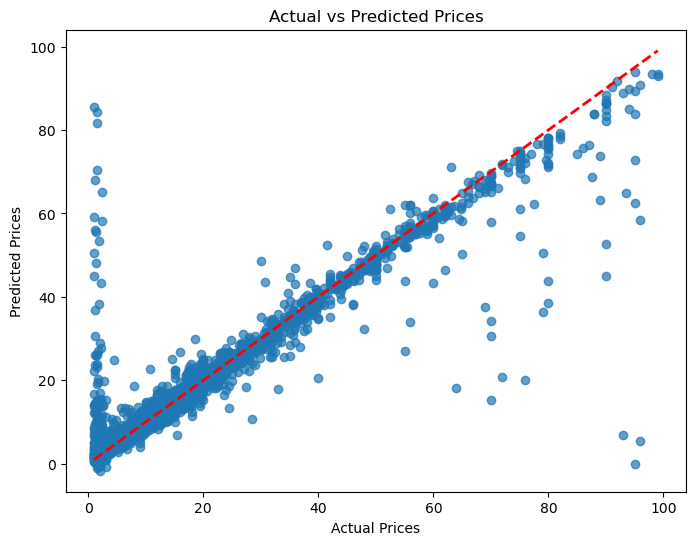

In [498]:
# Load your dataset
df = pd.read_csv(r'C:\Users\91934\Desktop\car dheko\finaldf.csv')

# Preview the data
print(df.head())
print(df.info())
# Assuming 'price' is the target variable
X = df.drop(columns=['price'])
y = df['price']
from joblib import dump, load

with open(r"C:\Users\91934\Desktop\car dheko\model_pipeline.joblib", 'rb') as file:
    pipeline = load(file)
# Predict using the pipeline
y_pred = pipeline.predict(X)

# Display first few predictions and actual values
predictions = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
print(predictions.head())

# Evaluate the model
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2}")
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
